# Importing Dataset And Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
dataset = pd.read_csv("DataSet.csv",na_values = '?')

## Dataset Information 

In [2]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Analysis 

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = dataset.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


#### Important Features 

[0.06982723 0.05761479 0.12909464 0.06046212 0.05647168 0.01937399
 0.03661764 0.08570775 0.09720533 0.08887744 0.06916181 0.12899501
 0.10059056]


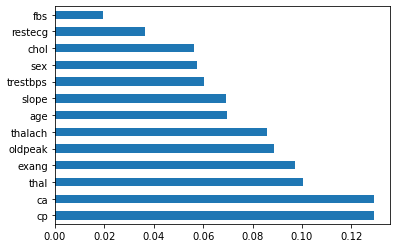

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

#### Correlation Matrix 

<AxesSubplot:>

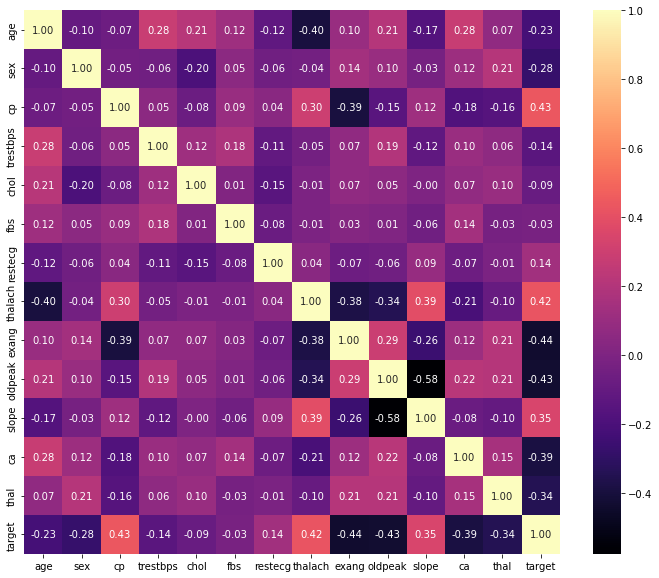

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),annot=True,cmap="magma",fmt='.2f')

# Data Visualization Using Seaborn

In [9]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
df2 = dataset.copy()
def chng(sex):
    if sex == 0:
        return 'Female'
    else:
        return 'Male'
    
df2['sex'] = df2['sex'].apply(chng)

def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'

### Gender V/S Target 

Text(0.5, 1.0, 'Gender v/s Target\n')

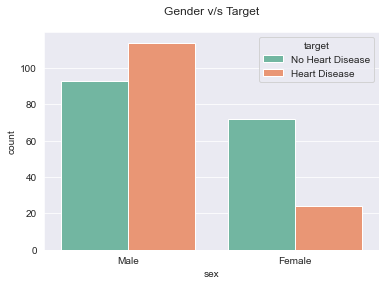

In [10]:
df2['target'] = df2['target'].apply(chng2)
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s Target\n')

### Chest Pain Type V/S Target 

Text(0.5, 1.0, 'Chest Pain Type v/s Target\n')

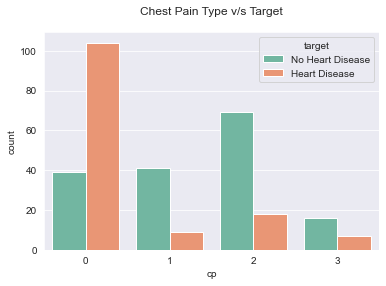

In [11]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s Target\n')

### Gender V/S Thalassemia 

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

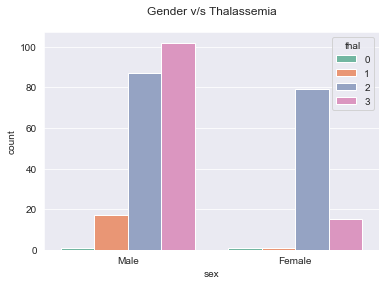

In [12]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')

### Slope V/S Target 

Text(0.5, 1.0, 'Slope v/s Target\n')

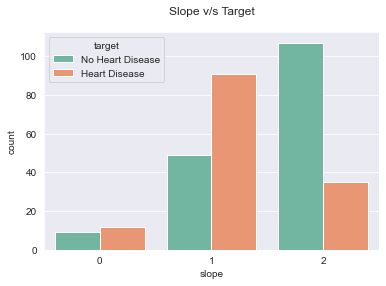

In [13]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

### Age Of Heart Diseased Patients 

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

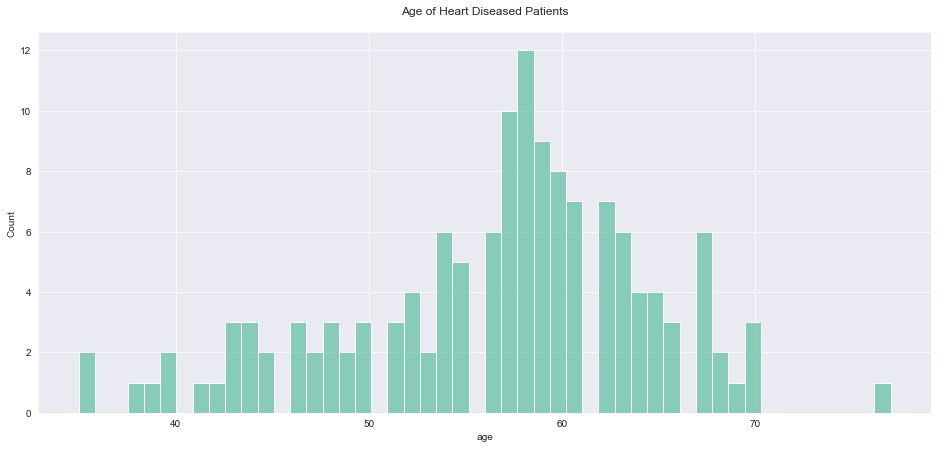

In [14]:
#Histplot
plt.figure(figsize=(16,7))
sns.histplot(dataset[dataset['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

# Coverting Categorical Value To One - Hot Encoding


In [15]:
dataset = pd.get_dummies(dataset, columns = ["cp","restecg","slope","ca","thal"])

In [16]:
dataset.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,1,0,0,0,0,0,0,1,0


In [17]:
dataset.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.544554,0.471947,...,0.468647,0.577558,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,0.547855,0.386139
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.498835,0.500038,...,0.499842,0.494765,0.411169,0.331734,0.248704,0.127605,0.081110,0.236774,0.498528,0.487668
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
numerical_col = ["age","trestbps","chol","thalach","oldpeak"]
cat_col = list(set(dataset.columns)-set(numerical_col)-{"target"})

# Spliting Data Into Training And Test

In [19]:
dataset_train,dataset_test = train_test_split(dataset,test_size = 0.2,random_state=42)
scaler = StandardScaler()
def get_features_and_target(dataset,numerical_col,cat_col,scaler):
    x_numerical_scaler = scaler.fit_transform(dataset[numerical_col]) #-1 to 1
    x_categorical = dataset[cat_col].to_numpy()
    x = np.hstack((x_numerical_scaler,x_categorical))
    y = dataset["target"]
    return x,y
x_train, y_train = get_features_and_target(dataset_train,numerical_col,cat_col,scaler)
x_test, y_test = get_features_and_target(dataset_test,numerical_col,cat_col,scaler)
len(dataset_train), len(dataset_test)

(242, 61)

## Logistic Regression

In [20]:
# Logistic Regression 
lr = LogisticRegression(solver='lbfgs',penalty='l2')
lr.fit(x_train,y_train)
test_pred = lr.predict(x_test)
print("Mean Square Error:", mean_squared_error(y_test,test_pred)*100,"%")
print("Accuracy:",accuracy_score(y_test,test_pred)*100,"%")

Mean Square Error: 9.836065573770492 %
Accuracy: 90.1639344262295 %


#### Cross Validation 

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k = 5
kf=KFold(n_splits=k,shuffle=True)
result = cross_val_score (lr,x_train,y_train,cv=kf)
print("Accuracy: ",np.average(result)*100,"%")

Accuracy:  83.86054421768708 %


## Decision Tree Classifier

In [22]:
# Decision Tree Classifier
dc_clf = DecisionTreeClassifier()
dc_clf.fit(x_train,y_train)
dlf_pred = dc_clf.predict(x_test)
print("Mean Square Error:", mean_squared_error(y_test,dlf_pred)*100,"%")
print("Accuracy:",accuracy_score(y_test,dlf_pred)*100,"%")

Mean Square Error: 18.0327868852459 %
Accuracy: 81.9672131147541 %


#### Cross Validation 

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k = 5
kf=KFold(n_splits=k,shuffle=True)
result = cross_val_score (dc_clf,x_train,y_train,cv=kf)
print("Accuracy: ",np.average(result)*100,"%")

Accuracy:  73.9625850340136 %


## Support Vector Machine

In [24]:
# Support Vector Machine
sc_clf = SVC()
sc_clf.fit(x_train,y_train)
svm_pred = sc_clf.predict(x_test)
print("Mean Square Error:", mean_squared_error(y_test,svm_pred)*100,"%")
print("Accuracy:",accuracy_score(y_test,svm_pred)*100,"%")

Mean Square Error: 11.475409836065573 %
Accuracy: 88.52459016393442 %


#### Cross Validation 

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k = 5
kf=KFold(n_splits=k,shuffle=True)
result = cross_val_score (sc_clf,x_train,y_train,cv=kf)
print("Accuracy: ",np.average(result)*100,"%")

Accuracy:  82.23639455782313 %


## Hyperparameter Tuning

In [26]:
parameters = {
    'Logistic Regression' : {
        'model': LogisticRegression(solver='lbfgs'),
        'params': {
            'C': [1,5,10],
        }
    },
    'Support Vector Machine': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C':[0.1,1,100,1000],
            'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]
        }  
    },
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]
        }
    },
    
}

In [27]:
accuracy_scores = []

for model_name,name in parameters.items():
    clf =  GridSearchCV(name['model'], name['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    accuracy_scores.append({
        'Model': model_name,
        'Best Accuracy': clf.best_score_,
        'Best Parameter': clf.best_params_
    })
    
acc_data = pd.DataFrame(accuracy_scores,columns=['Model','Best Accuracy','Best Parameter'])
acc_data

,Model,Best Accuracy,Best Parameter
0,Logistic Regression,0.842857,{'C': 5}
1,Support Vector Machine,0.834524,"{'C': 100, 'degree': 1, 'kernel': 'linear'}"
2,Decision Tree Classifier,0.789456,"{'criterion': 'gini', 'max_depth': 20, 'min_sa..."


-----------------------------------------------------------------------
### Efficiency(Logistic Regression) > Efficiency(Support Vector Machine) > Efficiency(Decision Tree Classifier)
-----------------------------------------------------------------------

# Ensemble Model (Stacking)

In [28]:
from sklearn.ensemble import VotingClassifier
Model1 = LogisticRegression()
Model2 = DecisionTreeClassifier()
Model3 = SVC()
Model = VotingClassifier([('LR',Model1),('DTR',Model2),('SVC',Model3)])
Model.fit(x_train,y_train)
ans = Model.score(x_test,y_test)
Model_pred = Model.predict(x_test)
print("Mean Square Error:", mean_squared_error(y_test,Model_pred)*100,"%")
print("Accuracy:",accuracy_score(y_test,Model_pred)*100,"%")

Mean Square Error: 9.836065573770492 %
Accuracy: 90.1639344262295 %



#### Cross Validation 

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 5
kf=KFold(n_splits=k,shuffle=True)
result = cross_val_score (Model,x_train,y_train,cv=kf)
print("Accuracy: ",np.average(result)*100,"%")

Accuracy:  81.82823129251699 %
